##Profit Prediction Using Multiple Regression Techniques using Company Dataset

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Library Versions Check

In [ ]:
import numpy
import pandas
import sklearn
import joblib

print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)



numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1
joblib: 1.4.2


Data Loading

In [ ]:
df = pd.read_csv('50_Startups.csv')

Data Exploration

In [ ]:
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None


In [ ]:
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [ ]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


Data Visualisation

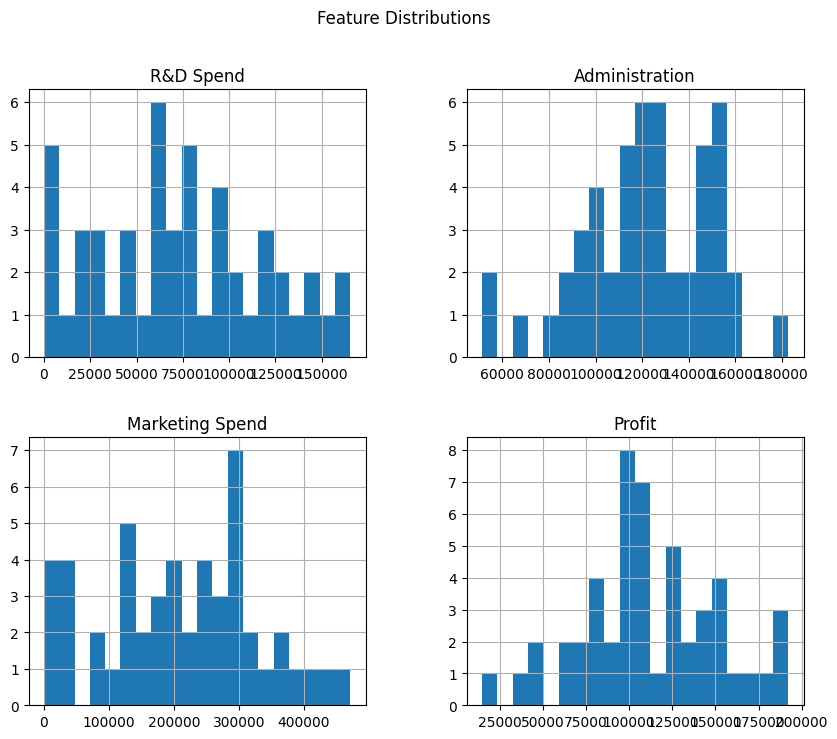

In [ ]:
df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].hist(bins=20, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

Data Preprocessing and Splitting the Dataset

In [ ]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Initialization

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'ElasticNet Regression': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


Model Evaluation

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² Score': r2_score(y_test, y_pred)
    }
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R² Score', ascending=False))


                                           MAE           MSE          RMSE  \
Random Forest                      6437.497740  7.262501e+07   8522.030780   
Lasso Regression                   6979.152252  8.092632e+07   8995.905803   
ElasticNet Regression              6979.152252  8.092632e+07   8995.905803   
Linear Regression                  6979.152252  8.092632e+07   8995.905803   
Ridge Regression                   6979.152252  8.092632e+07   8995.905803   
Polynomial Regression (Degree 2)   7506.064597  9.030488e+07   9502.888103   
Decision Tree                     13755.664000  4.000265e+08  20000.661970   

                                  R² Score  
Random Forest                     0.910316  
Lasso Regression                  0.900065  
ElasticNet Regression             0.900065  
Linear Regression                 0.900065  
Ridge Regression                  0.900065  
Polynomial Regression (Degree 2)  0.888484  
Decision Tree                     0.506013  


Model Comparison Visualization

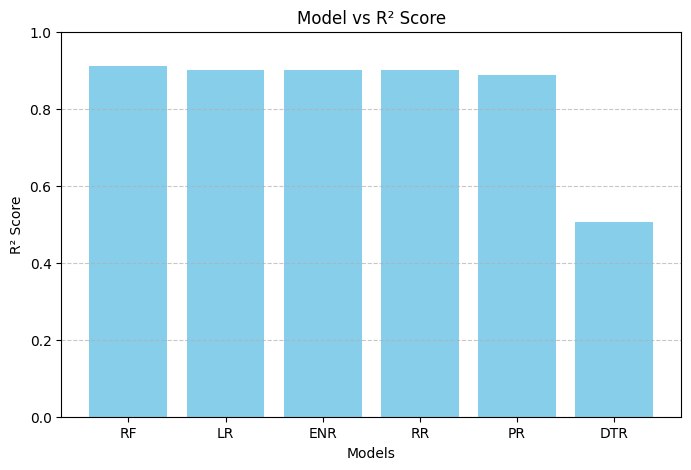

In [ ]:
import matplotlib.pyplot as plt

models = ['RF', 'LR', 'ENR', 'RR', 'PR', 'DTR']
r2 = [0.910316, 0.900065, 0.900065, 0.900065, 0.888484, 0.506013]
plt.figure(figsize=(8,5))
plt.bar(models, r2, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model vs R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Selection of best model

In [ ]:
import joblib
joblib.dump(models['Random Forest'], 'best_model.pkl')


['best_model.pkl']

Profit Prediction

In [ ]:
def predict_profit(input_data, model_name='Random Forest'):
    input_df = pd.DataFrame([input_data], columns=['R&D Spend', 'Administration', 'Marketing Spend'])
    model = models[model_name]
    model.fit(X_train, y_train)

    predicted_profit = model.predict(input_df)
    return predicted_profit[0]

sample_input = [100672, 91790, 249744]

best_model_name = results_df.index[0]
predicted_profit = predict_profit(sample_input, best_model_name)
print(f"Predicted Profit using {best_model_name}: ${predicted_profit:.2f}")


Predicted Profit using Linear Regression: $136557.11
